In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [3]:
image_path = "../output_videos/cropped_img.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

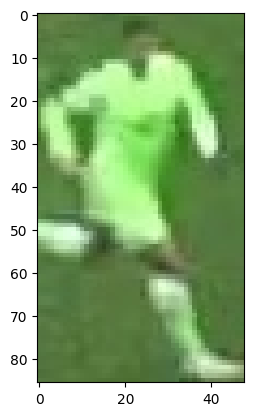

In [4]:
plt.imshow(image)
plt.show()

In [5]:
#take to top half of the image as we are going to use the tshirt color only

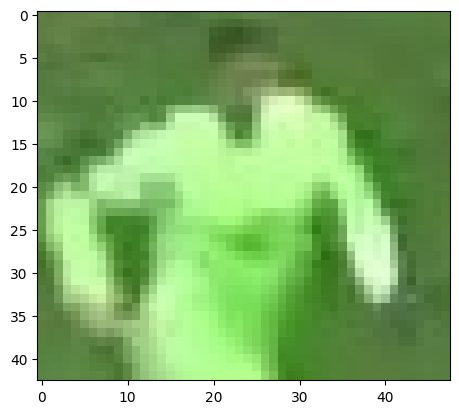

In [6]:
top_half_image=  image[0: int(image.shape[0]/2), :]
plt.imshow(top_half_image)
plt.show()

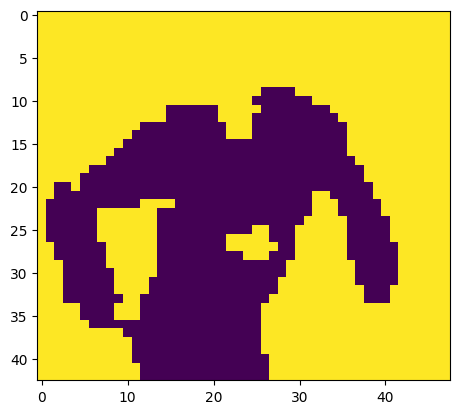

In [7]:
#remove the background from the tshirt color
#to segment the bg from the image we cluster the image into to parts, one cluster for bg and one for the shirt
from sklearn.cluster import KMeans
# Reshape the image into 2d array
image_2d = top_half_image.reshape(-1, 3)

# perform k-means clustering with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(image_2d)

# get the cluster labels
labels = kmeans.labels_

# reshape the labels into the orginal image shape
clustered_image = labels.reshape(top_half_image.shape[0], top_half_image.shape[1])

# Display the clustered image
plt.imshow(clustered_image)
plt.show()

In [8]:
#identify bg cluster 
corner_clusters = [clustered_image[0, 0], clustered_image[0, -1], clustered_image[-1, 0], clustered_image[-1, -1]]
non_player_cluster = max(set(corner_clusters), key=corner_clusters.count)
print(non_player_cluster)

1


In [9]:
#player cluster
player_cluster = 1-non_player_cluster
print(player_cluster)

0


In [10]:
kmeans.cluster_centers_[player_cluster]

array([171.11330698, 235.40316206, 142.52700922])